The code for the initial s-type screening round.

1. Train single-objective models

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import model
import optimize

selectivity
{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
training set r2: 0.862000
test set r2: 0.845000
training set mae: 0.351000
test set mae: 0.418000
training set rmse: 0.469000
test set rmse: 0.516000


activity
{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
training set r2: 0.876000
test set r2: 0.806000
training set mae: 0.584000
test set mae: 0.766000
training set rmse: 0.744000
test set rmse: 0.945000




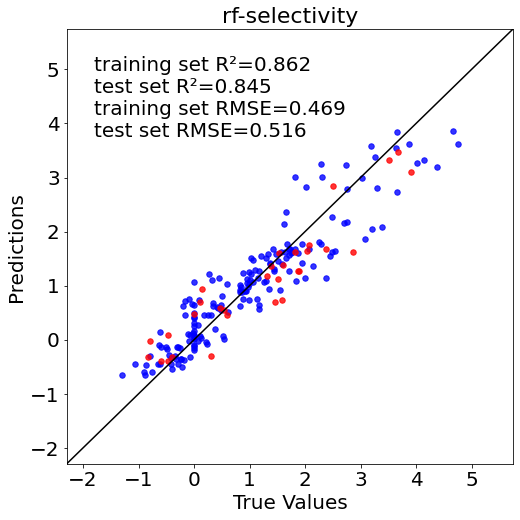

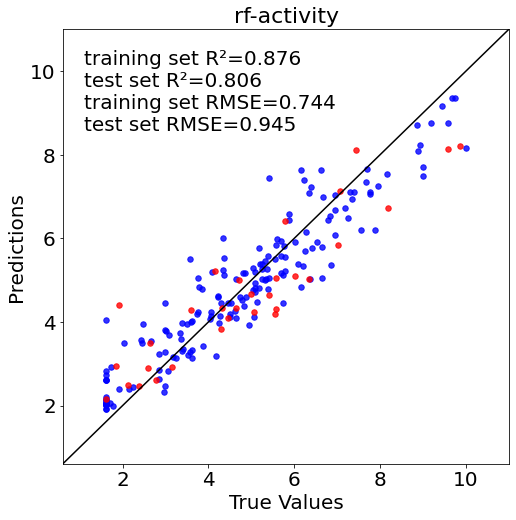

In [2]:
num_objective = 2   #set number of objectives
modelname = 'rf'  #choose 'rf', 'gbrt','gpr'
data_df = pd.read_csv('train.csv').iloc[:,0:]   #initial dataset for training

newdf_col = data_df.iloc[:,:-num_objective].columns   
best_params_dict = {}   
for i in range(num_objective):
    A_X = np.array(data_df.iloc[:,:-num_objective])
    A_y = np.around(np.array(data_df.iloc[:,-i-1]),6) 
    current_target=data_df.columns[-i-1]
    print(current_target)   

    X_shuffle,y_shuffle=shuffle(A_X,A_y,random_state=0) 
    X_tr,X_te,y_tr,y_te=train_test_split(X_shuffle,y_shuffle,test_size=0.15,random_state=0) 

    best_param = model.select_best_param(X_tr,y_tr,model=modelname)  

    y_min, y_max = y_tr.min() - 1, y_tr.max() + 1
    model.print_score(X_tr,X_te,y_tr,y_te,best_param,y_min,y_max,current_target,model=modelname)

    best_params_dict[f'objective_{i+1}'] = best_param
    print('\n')

2. Multi-objectives screening

Pareto frontier:
[[10.010197  4.13559 ]
 [ 9.741346  4.663046]
 [ 9.578628  4.748913]]


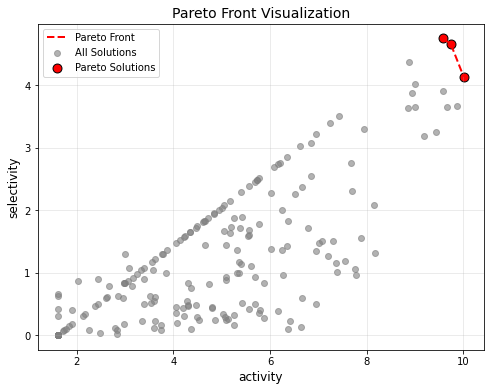

[120, 119, 117, 127, 125, 124, 123, 122, 121, 118, 115, 42, 32, 31, 33]


In [3]:
explore_df=pd.read_csv('explore.csv').iloc[:,0:]   #define explore space
explore=np.array(explore_df)

#acq: (True or False) Data in acq.csv exists if True. 
#kappa: Larger kappa increases exploration; kappa=0 ignores uncertainty. 
#num_recommend: number of samples to recommend.
recommend_sample, indices=optimize.screening(data_df, explore, best_params_dict, num_objective, modelname, num_recommend=15, kappa=1, acq=False, pareto_plt=True)
print(indices)   